In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [34]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train = train.to_numpy()[:,1]
test = test.to_numpy()[:,1]

print(f'Training shape: {train.shape}\nTest shape: {test.shape}')

Training shape: (1000,)
Test shape: (461,)


In [35]:
def normalizer(data:np)->np:
    mean = data.mean(axis=0)
    std = data.std(axis=0)
    return (data-mean)/std

train = normalizer(train)
test = normalizer(test)

In [36]:
x_train = np.zeros(shape=(49,20,1))
y_train = np.zeros(shape=(49))
for i in range(49):
    for j in range(20):
        x_train[i,j,0] = train[i*20 + j]
    y_train[i] = train[(i*20+20)%1000]
y_train[48] = test[0]
print(f'first batch is: {x_train[0]} and lable is {y_train[0]}')
x_train.shape

first batch is: [[ 0.46904276]
 [ 0.31932312]
 [ 0.50879009]
 [ 0.71906409]
 [ 0.2993193 ]
 [ 0.29916625]
 [ 0.7320271 ]
 [ 0.53664067]
 [ 0.23904004]
 [ 0.47861361]
 [ 0.23510845]
 [ 0.23102727]
 [ 0.39615585]
 [-0.12381546]
 [-0.08396908]
 [ 0.18827981]
 [ 0.07426134]
 [ 0.38473742]
 [ 0.08510605]
 [-0.04338918]] and lable is 0.6362911060418046


(49, 20, 1)

In [37]:
len(test)
x_test = np.zeros(shape=(23,20,1))
y_test = np.zeros(shape=(23))

for i in range(23):
    for j in range(20):
        x_test[i,j,0] = test[i*20+j]
    y_test[i] = test[(i*20+20)%421]
print(f'{x_test.shape}, {y_test.shape}')
print(x_test[0], y_test[0])

(23, 20, 1), (23,)
[[-0.47704856]
 [-0.63609207]
 [-0.92666863]
 [-1.16382102]
 [-0.70937681]
 [-0.81104635]
 [-0.6408671 ]
 [-0.72742617]
 [-0.58664444]
 [-1.11970648]
 [-0.49409653]
 [-0.87038608]
 [-0.23630178]
 [-1.16692063]
 [-0.34825791]
 [-0.8654588 ]
 [-1.15049321]
 [-1.09275562]
 [-1.03634731]
 [-0.78409241]] -0.7495155858595056


In [38]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(20,1)),
    tf.keras.layers.SimpleRNN(15),
    tf.keras.layers.Dense(1)
])

model.summary()
model.compile(optimizer='adam', loss='mae')

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_14 (SimpleRNN)    (None, 15)                255       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 16        
Total params: 271
Trainable params: 271
Non-trainable params: 0
_________________________________________________________________


In [39]:
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
2/2 [==============================] - 1s 193ms/step - loss: 0.9017 - val_loss: 0.9010
Epoch 2/100
2/2 [==============================] - 0s 40ms/step - loss: 0.8698 - val_loss: 0.8720
Epoch 3/100
2/2 [==============================] - 0s 45ms/step - loss: 0.8831 - val_loss: 0.8430
Epoch 4/100
2/2 [==============================] - 0s 46ms/step - loss: 0.7536 - val_loss: 0.8136
Epoch 5/100
2/2 [==============================] - 0s 44ms/step - loss: 0.7986 - val_loss: 0.7833
Epoch 6/100
2/2 [==============================] - 0s 46ms/step - loss: 0.8009 - val_loss: 0.7557
Epoch 7/100
2/2 [==============================] - 0s 43ms/step - loss: 0.6864 - val_loss: 0.7288
Epoch 8/100
2/2 [==============================] - 0s 43ms/step - loss: 0.6821 - val_loss: 0.7103
Epoch 9/100
2/2 [==============================] - 0s 42ms/step - loss: 0.6356 - val_loss: 0.6930
Epoch 10/100
2/2 [==============================] - 0s 41ms/step - loss: 0.5876 - val_loss: 0.6751
Epoch 11/100
2/2 [

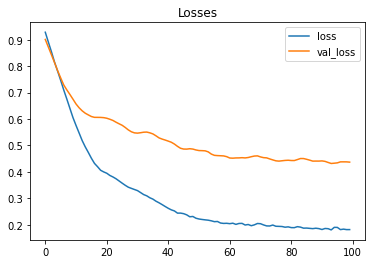

In [40]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Losses')
plt.show()

In [41]:
y_pred = model.predict(x_test)

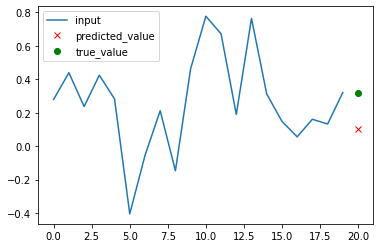

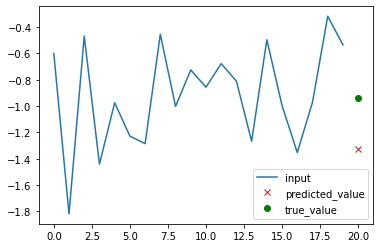

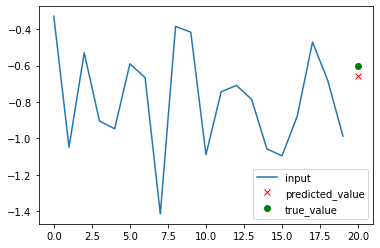

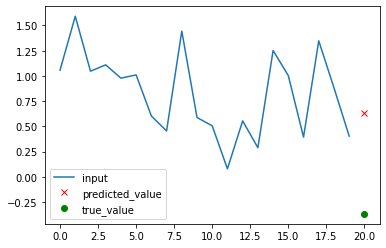

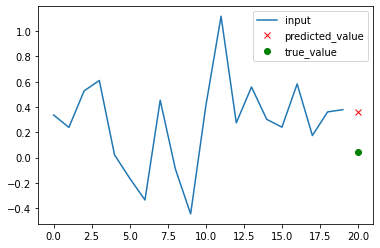

In [43]:
for i in np.random.randint(0,21,5):
    plt.plot(x_test[i][:], label='input')
    plt.plot(20,y_pred[i], 'rx',label='predicted_value')
    plt.plot(20,y_test[i],'go', label='true_value')
    plt.legend()
    plt.show()

In [55]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(20,1)),
    tf.keras.layers.GRU(10),
    tf.keras.layers.Dense(1)
])

model.summary()
model.compile(optimizer='adam', loss='mae')

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_3 (GRU)                  (None, 10)                390       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 11        
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [56]:
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
2/2 [==============================] - 2s 317ms/step - loss: 1.1837 - val_loss: 1.1323
Epoch 2/100
2/2 [==============================] - 0s 20ms/step - loss: 1.1384 - val_loss: 1.1190
Epoch 3/100
2/2 [==============================] - 0s 21ms/step - loss: 1.1284 - val_loss: 1.1072
Epoch 4/100
2/2 [==============================] - 0s 22ms/step - loss: 1.1275 - val_loss: 1.0955
Epoch 5/100
2/2 [==============================] - 0s 21ms/step - loss: 1.1288 - val_loss: 1.0838
Epoch 6/100
2/2 [==============================] - 0s 20ms/step - loss: 1.0551 - val_loss: 1.0724
Epoch 7/100
2/2 [==============================] - 0s 20ms/step - loss: 1.0528 - val_loss: 1.0610
Epoch 8/100
2/2 [==============================] - 0s 21ms/step - loss: 1.0638 - val_loss: 1.0496
Epoch 9/100
2/2 [==============================] - 0s 21ms/step - loss: 1.0243 - val_loss: 1.0384
Epoch 10/100
2/2 [==============================] - 0s 21ms/step - loss: 1.0622 - val_loss: 1.0280
Epoch 11/100
2/2 [

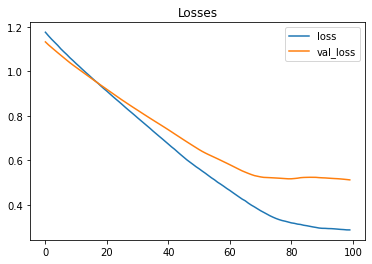

In [57]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Losses')
plt.show()